In [337]:
#BIT 3444 - Project 02 - Seth Lim
#Education, Health, and Military Spending of top 10 Countries

In [339]:
#1. What date did you find your raw data?
#11/19
#2. What date did you start writing your code?
#11/20
#3. What date did you finish writing your code?
#11/27
#4. How many times did you review and modify your overall code?
#7-10 
#5. How many times did you review/redo your final presentation before submission?
#10 

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [573]:
#display options for pandas
pd.set_option('display.notebook_repr_html', True) #display pandas DataFRames as HTML tables
pd.set_option('display.precision', 2) #sets teh precision for displaying numerical data to 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format) #sets the loating-point number format to 2 decimal places using python string

In [575]:
#load the relevant data for absolute $ military spending
df = pd.read_excel('SIPRI-Milex-data-1948-2023.xlsx', 'Current US$', skiprows=5)

In [452]:
df

,Country,Notes,1948,1949,1950,1951,1952,1953,1954,1955,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,§,...,...,...,...,...,...,...,...,...,9724.38,10412.71,10217.08,10073.36,9583.72,10303.60,9708.28,9112.46,9145.81,18263.97
4,Libya,‡§¶,...,...,...,...,...,...,...,...,...,3755.65,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Syria,§,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Türkiye,‖,...,197.68,212.97,231.81,257.77,294.03,332.08,382.92,...,17576.54,15668.75,17827.70,17822.74,19648.69,20436.92,17478.41,15567.41,10779.90,15827.85
190,United Arab Emirates,§,...,...,...,...,...,...,...,...,...,22755.07,...,...,...,...,...,...,...,...,...
191,"Yemen, North",§,...,...,...,...,...,...,...,...,...,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx


In [577]:
years = [year for year in range(2017,2021+1)]
years

[2017, 2018, 2019, 2020, 2021]

In [579]:
df = df[['Country'] + years]
df

,Country,2017,2018,2019,2020,2021
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,NaN,NaN,NaN,NaN,NaN
2,North Africa,NaN,NaN,NaN,NaN,NaN
3,Algeria,10073.36,9583.72,10303.60,9708.28,9112.46
4,Libya,...,...,...,...,...
...,...,...,...,...,...,...
188,Syria,...,...,...,...,...
189,Türkiye,17822.74,19648.69,20436.92,17478.41,15567.41
190,United Arab Emirates,...,...,...,...,...
191,"Yemen, North",xxx,xxx,xxx,xxx,xxx


In [581]:
#converting all values to numbers and removing non-numeric values
df[years] = df[years].apply(pd.to_numeric, errors='coerce') #error sign still remains, it is fine; proceed on

In [583]:
df = df.dropna()

In [585]:
df.head()

,Country,2017,2018,2019,2020,2021
3,Algeria,10073.36,9583.72,10303.60,9708.28,9112.46
5,Morocco,3461.46,3696.86,3721.32,4830.96,5378.37
6,Tunisia,858.95,844.23,1000.92,1157.37,1250.45
8,Angola,3062.87,1983.61,1470.94,993.59,981.45
9,Benin,116.14,90.21,68.11,71.82,97.42


In [465]:
#sorting to find the top 10 countries
top_10_df = df.sort_values(by=2021, ascending=False).head(10)

In [587]:
top_10_df

,Country,2017,2018,2019,2020,2021
72,United States of America,646752.93,682491.40,734344.10,778397.20,806230.20
99,China,210443.03,232530.60,240332.56,257973.43,285930.52
94,India,64559.44,66257.80,71468.90,72937.06,76348.54
151,Russia,66913.03,61609.20,65201.34,61712.54,65907.71
174,United Kingdom,52075.01,55832.92,56567.60,58332.37,65136.22
187,Saudi Arabia,70400.00,74612.27,65362.67,64558.40,63194.67
160,France,49195.66,51409.81,50118.93,52747.06,56647.00
161,Germany,42281.11,46497.68,49079.44,53318.71,56513.13
100,Japan,45058.47,48535.91,50778.01,51396.54,50957.47
102,"Korea, South",39170.68,43069.97,44102.24,46117.10,50873.79


In [469]:
#indexing
top_10_df_indexed_by_country = top_10_df.set_index('Country')

In [471]:
top_10_df_indexed_by_country

,2017,2018,2019,2020,2021
Country,,,,,
United States of America,646752.93,682491.40,734344.10,778397.20,806230.20
China,210443.03,232530.60,240332.56,257973.43,285930.52
India,64559.44,66257.80,71468.90,72937.06,76348.54
Russia,66913.03,61609.20,65201.34,61712.54,65907.71
United Kingdom,52075.01,55832.92,56567.60,58332.37,65136.22
Saudi Arabia,70400.00,74612.27,65362.67,64558.40,63194.67
France,49195.66,51409.81,50118.93,52747.06,56647.00
Germany,42281.11,46497.68,49079.44,53318.71,56513.13
Japan,45058.47,48535.91,50778.01,51396.54,50957.47


In [589]:
#Military % spending to country's GDP
#loading file needed
M_P = pd.read_excel('SIPRI-Milex-data-1948-2023.xlsx', 'Share of GDP', skiprows=5)

In [475]:
M_P

,Country,Notes,1948,1949,1950,1951,1952,1953,1954,1955,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,§,...,...,...,...,...,...,...,...,...,0.06,0.06,0.06,0.06,0.05,0.06,0.07,0.06,0.05,0.08
4,Libya,‡§¶,...,...,...,...,...,...,...,...,...,0.15,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Syria,§,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Türkiye,‖,...,...,...,...,...,...,...,...,...,0.02,0.02,0.02,0.02,0.03,0.03,0.02,0.02,0.01,0.02
190,United Arab Emirates,§,...,...,...,...,...,...,...,...,...,0.06,...,...,...,...,...,...,...,...,...
191,"Yemen, North",§,...,...,...,...,...,...,...,...,...,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx


In [591]:
#filtering for the years 2017-2021 and getting rid of the empty and NaN values
years = [year for year in range(2017,2021+1)]
years

M_P = M_P[['Country'] + years]
M_P

,Country,2017,2018,2019,2020,2021
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,NaN,NaN,NaN,NaN,NaN
2,North Africa,NaN,NaN,NaN,NaN,NaN
3,Algeria,0.06,0.05,0.06,0.07,0.06
4,Libya,...,...,...,...,...
...,...,...,...,...,...,...
188,Syria,...,...,...,...,...
189,Türkiye,0.02,0.03,0.03,0.02,0.02
190,United Arab Emirates,...,...,...,...,...
191,"Yemen, North",xxx,xxx,xxx,xxx,xxx


In [593]:
#converting all values to numbers and removing non-numeric values
M_P[years] = M_P[years].apply(pd.to_numeric, errors='coerce') #error sign still remains, it is fine; proceed on

In [595]:
M_P = M_P.dropna()

In [597]:
M_P.head()

,Country,2017,2018,2019,2020,2021
3,Algeria,0.06,0.05,0.06,0.07,0.06
5,Morocco,0.03,0.03,0.03,0.04,0.04
6,Tunisia,0.02,0.02,0.02,0.03,0.03
8,Angola,0.03,0.02,0.02,0.02,0.01
9,Benin,0.01,0.01,0.00,0.00,0.01


In [599]:
#dataframe of the 10 countries based on the top 10 military spending in %
data = {'Country': ['United States of America', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'],
             '2017': [3.30, 1.71, 4.25, 2.53, 9.85, 1.95, 1.15, 1.91, 0.91, 2.42],
             '2018': [3.30, 1.67, 3.72, 2.42, 8.81, 1.94, 1.17, 1.84, 0.96, 2.50],
             '2019': [3.41, 1.68, 3.86, 2.55, 7.79, 1.99, 1.26, 1.84, 0.99, 2.67],

             '2020': [3.65, 1.76, 4.17, 2.81, 8.79, 2.16, 1.37, 2.00, 1.02, 2.80],
             '2021': [3.42, 1.61, 3.61, 2.48, 7.24, 2.07, 1.32, 1.91, 1.02, 2.80],
            
            }

#dataframe
Top_10_MP = pd.DataFrame(data)

#setting 'Country' column as the list for better readability when displaying results
Top_10_MP.set_index('Country', inplace=True)

#display
print(Top_10_MP)

                          2017  2018  2019  2020  2021
Country                                               
United States of America  3.30  3.30  3.41  3.65  3.42
China                     1.71  1.67  1.68  1.76  1.61
Russia                    4.25  3.72  3.86  4.17  3.61
India                     2.53  2.42  2.55  2.81  2.48
Saudi Arabia              9.85  8.81  7.79  8.79  7.24
United Kingdom            1.95  1.94  1.99  2.16  2.07
Germany                   1.15  1.17  1.26  1.37  1.32
France                    1.91  1.84  1.84  2.00  1.91
Japan                     0.91  0.96  0.99  1.02  1.02
Korea, South              2.42  2.50  2.67  2.80  2.80


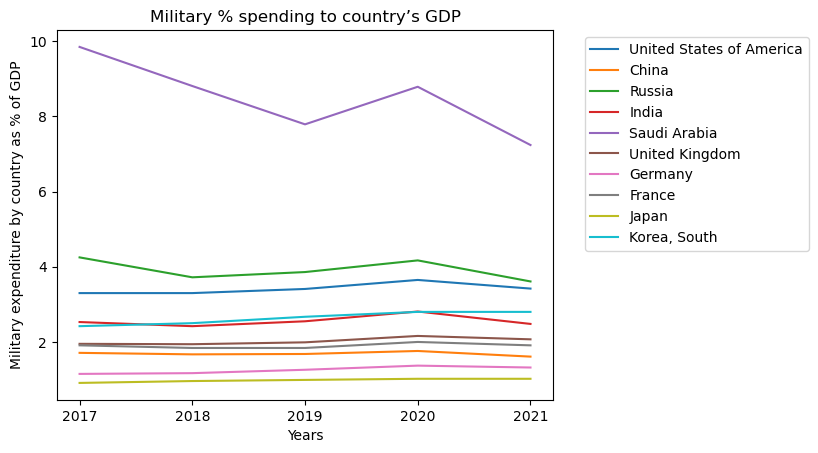

In [601]:
#plotting a line chart

#data
x= [2017, 2018, 2019, 2020, 2021]
y1= [3.30, 3.30, 3.41,  3.65,  3.42]
y2= [ 1.71,  1.67,  1.68,  1.76,  1.61]
y3= [4.25,  3.72,  3.86,  4.17,  3.61]
y4= [ 2.53,  2.42,  2.55,  2.81,  2.48]
y5= [9.85,  8.81,  7.79,  8.79,  7.24]
y6= [1.95,  1.94,  1.99,  2.16,  2.07]
y7= [1.15,  1.17,  1.26,  1.37,  1.32]
y8= [1.91,  1.84,  1.84,  2.00,  1.91]
y9= [0.91,  0.96,  0.99,  1.02,  1.02]
y10= [2.42,  2.50, 2.67,  2.80,  2.80]

#plot adjustments
plt.plot(x,y1, label= 'United States of America')
plt.plot(x,y2, label= 'China')
plt.plot(x,y3, label= 'Russia')
plt.plot(x,y4, label='India')
plt.plot(x,y5, label='Saudi Arabia')
plt.plot(x,y6, label='United Kingdom')
plt.plot(x,y7, label='Germany')
plt.plot(x,y8, label='France')
plt.plot(x,y9, label='Japan')
plt.plot(x,y10, label='Korea, South')

#legend and axis adjustments
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Years')
plt.xticks(x)
plt.ylabel('Military expenditure by country as % of GDP')
plt.title('Military % spending to country’s GDP')


#saving as a PNG file
plt.savefig('Military % spending to country’s GDP.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

#displaying plot
plt.show()

In [489]:
#The 10 countries healthcare % spending based on the top 10 military spending
H_P = pd.read_excel('Health_API_SH.XPD.CHEX.GD.ZS_DS2_en_excel_v2_15.xls', 'Data', skiprows=3)
H_P.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.84,6.00,6.10,5.95,5.81,5.83,5.88,5.87,NaN,NaN
2,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.53,10.11,11.82,12.62,14.21,14.83,15.53,21.83,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.58,3.81,3.80,3.82,3.43,3.42,3.84,4.14,NaN,NaN
4,Angola,AGO,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.43,2.61,2.71,2.79,2.59,2.48,3.22,2.96,NaN,NaN


In [603]:
#Specific rows and columns by name
R = ['United States', 'China', 'Russian Federation', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, Rep.']
C = ['Country Name', '2017', '2018', '2019', '2020', '2021']

#Filtering with the specific rows and columns 
H_P_filter = H_P.loc[H_P['Country Name'].isin(R), C]

print(H_P_filter)

           Country Name  2017  2018  2019  2020  2021
40                China  5.07  5.17  5.35  5.59  5.38
55              Germany 11.34 11.48 11.72 12.69 12.93
77               France 11.35 11.21 11.09 12.13 12.31
81       United Kingdom  9.60  9.73  9.96 12.16 12.36
109               India  2.94  2.86  2.95  3.34  3.28
119               Japan 10.66 10.74 10.97 11.00 10.82
126         Korea, Rep.  7.05  7.49  8.17  8.35  9.33
202  Russian Federation  5.36  5.36  5.65  7.57  7.39
205        Saudi Arabia  6.03  5.34  5.47  6.65  5.97
251       United States 16.77 16.63 16.67 18.76 17.36


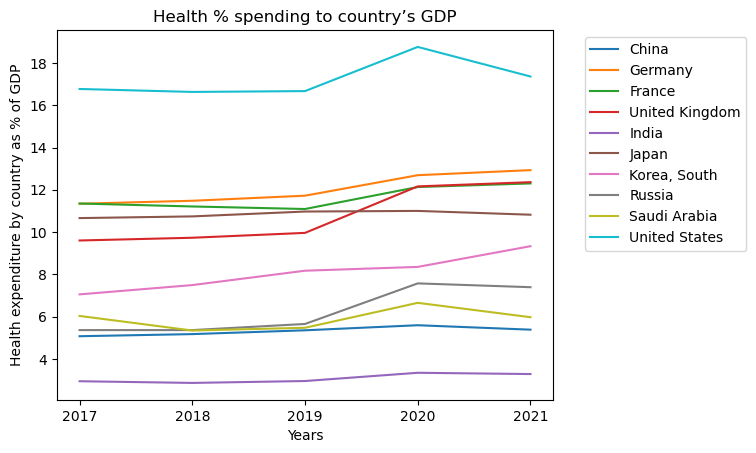

In [605]:
#plotting line chart

#data
x= [2017, 2018, 2019, 2020, 2021]
y1= [5.07, 5.17, 5.35,  5.59,  5.38]
y2= [ 11.34,  11.48,  11.72,  12.69, 12.93]
y3= [11.35, 11.21, 11.09, 12.13, 12.3]
y4= [ 9.60,  9.73,  9.96, 12.16, 12.36]
y5= [2.94,  2.86,  2.95,  3.34, 3.28]
y6= [10.66, 10.74, 10.97, 11.00, 10.82]
y7= [7.05,  7.49,  8.17,  8.35,  9.33]
y8=  [5.36,  5.36,  5.65,  7.57,  7.39]
y9= [6.03,  5.34,  5.47,  6.65,  5.97]
y10= [16.77, 16.63, 16.67, 18.76, 17.36]

#plot adjustments
plt.plot(x,y1, label= 'China')
plt.plot(x,y2, label= 'Germany')
plt.plot(x,y3, label= 'France')
plt.plot(x,y4, label='United Kingdom')
plt.plot(x,y5, label='India')
plt.plot(x,y6, label='Japan')
plt.plot(x,y7, label='Korea, South')
plt.plot(x,y8, label='Russia')
plt.plot(x,y9, label='Saudi Arabia')
plt.plot(x,y10, label='United States')

#legend and axis adjustments
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Years')
plt.xticks(x)
plt.ylabel('Health expenditure by country as % of GDP')
plt.title('Health % spending to country’s GDP')


#saving as a PNG file
plt.savefig('Health % spending to country’s GDP.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

#displaying plot
plt.show()


In [495]:
#The 10 countries educational % spending based on the top 10 military spending
E_P = pd.read_excel('Education_API_SE.XPD.TOTL.GD.ZS_DS2_en_excel_v2_560.xls', 'Data', skiprows=3)
E_P.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.85,5.89,5.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.72,4.75,4.88,4.82,4.74,4.51,4.35,4.67,4.24,NaN
2,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.70,3.26,4.54,4.34,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.91,3.20,2.78,3.54,3.07,3.10,3.40,3.28,2.93,NaN
4,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.93,3.10,2.76,2.47,2.05,2.07,2.74,2.30,2.33,NaN


In [497]:
#Specific rows and columns by name
E_R = ['United States', 'China', 'Russian Federation', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, Rep.']
E_C = ['Country Name', '2017', '2018', '2019', '2020', '2021']


In [499]:
#Specific rows and columns by name
E_R = ['United States', 'China', 'Russian Federation', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, Rep.']
E_C = ['Country Name', '2017', '2018', '2019', '2020', '2021']

#Filtering with the specific rows and columns 
E_P_filter = E_P.loc[E_P['Country Name'].isin(E_R), E_C]

print(E_P_filter)

           Country Name  2017  2018  2019  2020  2021
40                China  3.62  3.54  3.54  3.57  3.30
55              Germany  4.87  4.98  5.12  5.59  4.51
77               France  5.45  5.41  5.35  5.68  5.24
81       United Kingdom  5.43  5.20  5.25  5.50  5.40
109               India  4.31  4.38  3.90  4.29  4.64
119               Japan  3.13  3.08  3.16  3.31  3.46
126         Korea, Rep.  4.33  4.46  4.68  4.80  5.40
202  Russian Federation  4.69  4.68  3.51  3.70   NaN
205        Saudi Arabia   NaN   NaN   NaN   NaN   NaN
251       United States  5.12  4.93  4.99  5.44  5.59


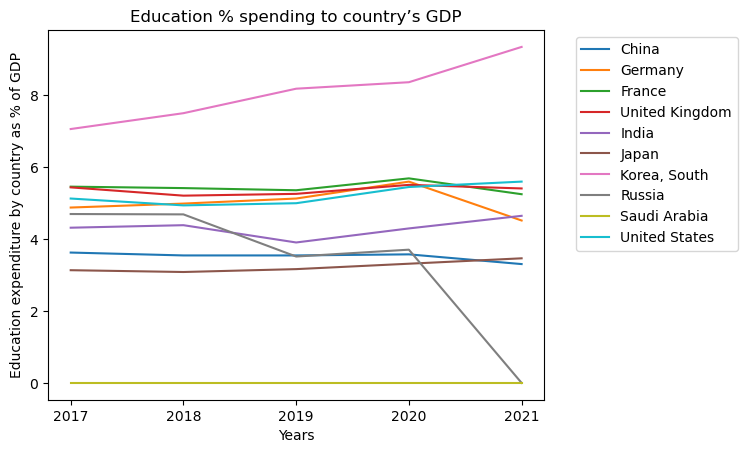

In [501]:
#plotting line chart

#data
x= [2017, 2018, 2019, 2020, 2021]
y1= [3.62,  3.54,  3.54,  3.57,  3.30]
y2= [4.87,  4.98,  5.12,  5.59,  4.51]
y3= [5.45,  5.41,  5.35,  5.68,  5.24]
y4= [5.43,  5.20,  5.25,  5.50,  5.40]
y5= [4.31,  4.38,  3.90,  4.29,  4.64]
y6= [3.13,  3.08,  3.16,  3.31,  3.46]
y7= [7.05,  7.49,  8.17,  8.35,  9.33]
y8=  [4.69,  4.68,  3.51,  3.70, 0] #replaced the NaN values with 0
y9= [0,   0,   0,   0,   0] #replaced the NaN values with 0
y10= [5.12,  4.93,  4.99,  5.44,  5.59]


#plot adjustments
plt.plot(x,y1, label= 'China')
plt.plot(x,y2, label= 'Germany')
plt.plot(x,y3, label= 'France')
plt.plot(x,y4, label='United Kingdom')
plt.plot(x,y5, label='India')
plt.plot(x,y6, label='Japan')
plt.plot(x,y7, label='Korea, South')
plt.plot(x,y8, label='Russia')
plt.plot(x,y9, label='Saudi Arabia')
plt.plot(x,y10, label='United States')

#legend and axis adjustments
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Years')
plt.xticks(x)
plt.ylabel('Education expenditure by country as % of GDP')
plt.title('Education % spending to country’s GDP')


#saving as a PNG file
plt.savefig('Education % spending to country’s GDP.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

#displaying plot
plt.show()


In [607]:
#loading data of each country's GDP (current US$)
GDP = pd.read_excel('P_Data_Extract_From_World_Development_Indicators.xlsx')

In [609]:
GDP

,Series Name,Series Code,Country Name,Country Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,GDP (current US$),NY.GDP.MKTP.CD,United States,USA,19612102000000.00,20656516000000.00,21521395000000.00,21322950000000.00,23594031000000.00
1,GDP (current US$),NY.GDP.MKTP.CD,United Kingdom,GBR,2680148052335.30,2871340347581.79,2851407164907.81,2697806592293.86,3141506156618.70
2,GDP (current US$),NY.GDP.MKTP.CD,Russian Federation,RUS,1574199360089.00,1657328773461.31,1693115002708.32,1493075894362.14,1843392293734.38
3,GDP (current US$),NY.GDP.MKTP.CD,China,CHN,12310491333980.89,13894907857880.58,14279968506271.73,14687744162801.03,17820459508852.18
4,GDP (current US$),NY.GDP.MKTP.CD,India,IND,2651474262755.59,2702929641648.14,2835606256558.84,2674851578586.86,3167270623260.52
5,GDP (current US$),NY.GDP.MKTP.CD,Saudi Arabia,SAU,714994666666.67,846583733333.33,838564800000.00,734271200000.00,874156000000.00
6,GDP (current US$),NY.GDP.MKTP.CD,Japan,JPN,4930837369151.42,5040880939324.86,5117993853016.51,5055587093501.59,5034620784584.98
7,GDP (current US$),NY.GDP.MKTP.CD,"Korea, Rep.",KOR,1623074183501.90,1725373496825.43,1651422932447.77,1644312831906.17,1818432106880.04
8,GDP (current US$),NY.GDP.MKTP.CD,Germany,DEU,3690849152517.65,3974443355019.60,3889177589254.90,3887727161914.41,4278503934689.85
9,GDP (current US$),NY.GDP.MKTP.CD,France,FRA,2595151045197.65,2790956878746.66,2728870246705.88,2647418691598.45,2959355819170.50


In [611]:
#dataframe for this each country's GDP
GDP_df = pd.DataFrame({
    'Country': ['United States of America', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'],
             '2017': [19612102000000.00, 12310491333980.89, 1574199360089.00, 2651474262755.59, 714994666666.67, 2680148052335.30, 3690849152517.65, 2595151045197.65, 4930837369151.42, 1623074183501.90],
             '2018': [20656516000000.00	, 13894907857880.58, 1657328773461.31, 2702929641648.14, 846583733333.33, 2871340347581.79, 3974443355019.6, 2790956878746.66, 5040880939324.86, 1725373496825.43],
             '2019': [21521395000000.00	, 14279968506271.73, 1693115002708.32, 2835606256558.84, 838564800000.00, 2851407164907.81, 3889177589254.90, 2728870246705.88, 5117993853016.51, 1651422932447.77],

             '2020': [21322950000000.00, 14687744162801.03, 1493075894362.14, 2674851578586.86, 734271200000.00, 2697806592293.86, 3887727161914.41, 2647418691598.45, 5055587093501.59, 1644312831906.17],
             '2021': [23594031000000.00, 17820459508852.18, 1843392293734.38, 3167270623260.52, 874156000000.00, 3141506156618.70, 4278503934689.85, 2959355819170.50, 5034620784584.98, 1818432106880.04]
            
            })
print(GDP_df)


                    Country              2017              2018  \
0  United States of America 19612102000000.00 20656516000000.00   
1                     China 12310491333980.89 13894907857880.58   
2                    Russia  1574199360089.00  1657328773461.31   
3                     India  2651474262755.59  2702929641648.14   
4              Saudi Arabia   714994666666.67   846583733333.33   
5            United Kingdom  2680148052335.30  2871340347581.79   
6                   Germany  3690849152517.65  3974443355019.60   
7                    France  2595151045197.65  2790956878746.66   
8                     Japan  4930837369151.42  5040880939324.86   
9              Korea, South  1623074183501.90  1725373496825.43   

               2019              2020              2021  
0 21521395000000.00 21322950000000.00 23594031000000.00  
1 14279968506271.73 14687744162801.03 17820459508852.18  
2  1693115002708.32  1493075894362.14  1843392293734.38  
3  2835606256558.84  267485157

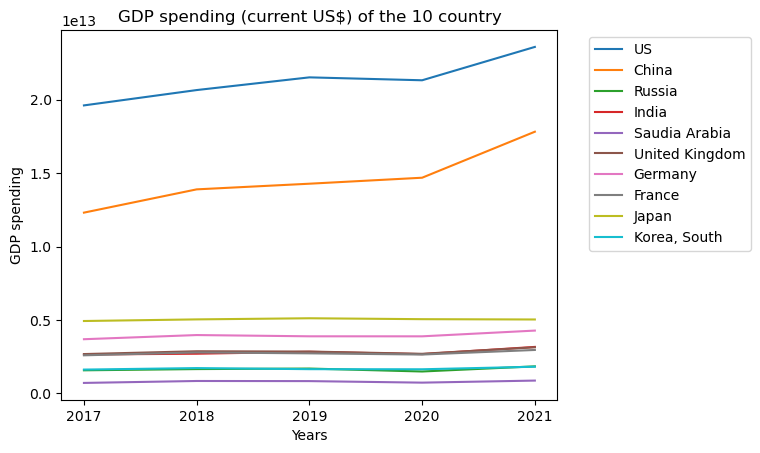

In [613]:
#line chart
#data
x= [2017, 2018, 2019, 2020, 2021]
y1= [19612102000000.00,	20656516000000.00,	21521395000000.00,	21322950000000.00,	23594031000000.00]
y2= [12310491333980.89,	13894907857880.58,	14279968506271.73,	14687744162801.03,	17820459508852.18]
y3= [1574199360089.00,	1657328773461.31,	1693115002708.32,	1493075894362.14,	1843392293734.38]
y4= [2651474262755.59,	2702929641648.14,	2835606256558.84,	2674851578586.86,	3167270623260.52]
y5= [714994666666.67,	846583733333.33,	838564800000.00,	734271200000.00,	874156000000.00]
y6= [2680148052335.30,	2871340347581.79,	2851407164907.81,	2697806592293.86,	3141506156618.70]
y7= [3690849152517.65,	3974443355019.60,	3889177589254.90,	3887727161914.41,	4278503934689.85]
y8=  [2595151045197.65,	2790956878746.66,	2728870246705.88,	2647418691598.45,	2959355819170.50] 
y9= [4930837369151.42,	5040880939324.86,	5117993853016.51,	5055587093501.59,	5034620784584.98] 
y10= [1623074183501.90,	1725373496825.43,	1651422932447.77,	1644312831906.17,	1818432106880.04]

#plot adjustments
plt.plot(x,y1, label= 'US')
plt.plot(x,y2, label= 'China')
plt.plot(x,y3, label= 'Russia')
plt.plot(x,y4, label='India')
plt.plot(x,y5, label='Saudia Arabia')
plt.plot(x,y6, label='United Kingdom')
plt.plot(x,y7, label='Germany')
plt.plot(x,y8, label='France')
plt.plot(x,y9, label='Japan')
plt.plot(x,y10, label='Korea, South')

#legend and axis adjustments
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Years')
plt.xticks(x)
plt.ylabel('GDP spending')
plt.title('GDP spending (current US$) of the 10 country')


#saving as a PNG file
plt.savefig('GDP spending (current US$) of the top 10 country.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

#displaying plot
plt.show()

In [511]:
#summing the years 2017-2021 and establishing a 'Total' column
GDP_list = ['2017', '2018', '2019', '2020', '2021']
GDP_df['Total'] = GDP_df[GDP_list].sum(axis=1)
GDP_df

,Country,2017,2018,2019,2020,2021,Total
0,United States of America,19612102000000.00,20656516000000.00,21521395000000.00,21322950000000.00,23594031000000.00,106706994000000.00
1,China,12310491333980.89,13894907857880.58,14279968506271.73,14687744162801.03,17820459508852.18,72993571369786.41
2,Russia,1574199360089.00,1657328773461.31,1693115002708.32,1493075894362.14,1843392293734.38,8261111324355.15
3,India,2651474262755.59,2702929641648.14,2835606256558.84,2674851578586.86,3167270623260.52,14032132362809.95
4,Saudi Arabia,714994666666.67,846583733333.33,838564800000.00,734271200000.00,874156000000.00,4008570400000.00
5,United Kingdom,2680148052335.30,2871340347581.79,2851407164907.81,2697806592293.86,3141506156618.70,14242208313737.46
6,Germany,3690849152517.65,3974443355019.60,3889177589254.90,3887727161914.41,4278503934689.85,19720701193396.41
7,France,2595151045197.65,2790956878746.66,2728870246705.88,2647418691598.45,2959355819170.50,13721752681419.14
8,Japan,4930837369151.42,5040880939324.86,5117993853016.51,5055587093501.59,5034620784584.98,25179920039579.36
9,"Korea, South",1623074183501.90,1725373496825.43,1651422932447.77,1644312831906.17,1818432106880.04,8462615551561.31


In [615]:
#percentage change where Total is 100% 
years = ['2017', '2018', '2019', '2020', '2021']
for year in years:
        GDP_df[f'{year} (%)'] = (GDP_df[year] / GDP_df['Total']) * 100

#printing the country name and % columns for the GDP
print(GDP_df[['Country'] + [f'{year} (%)' for year in years]])

KeyError: 'Total'

In [ ]:
#dataframe for the file
GDP_df = { 
    'Country': ['United States of America', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'],
             '2017': [18.38, 16.87, 190.06, 18.90, 17.84, 18.82, 18.72, 18.91, 19.58, 19.18],
             '2018': [19.36, 19.04, 20.06, 19.26, 21.12, 20.16, 20.15, 20.34, 20.02, 20.39],
             '2019': [20.17, 19.56, 20.50, 20.21, 20.92, 20.02, 19.72, 19.89, 20.33, 19.51],

             '2020': [19.98, 20.12, 18.07, 19.06, 18.32, 18.94, 19.71, 19.29, 20.08, 19.43],
             '2021': [22.11, 24.41, 22.31, 22.57, 21.81, 22.06, 21.70, 21.57, 19.99, 21.49]
            
            }
#average percent for each country GDP                      
GDP_df_percent = pd.DataFrame(GDP_df,
                columns = ('2017', '2018', '2019', '2020', '2021'),
                index = ('United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'))

In [ ]:
GDP_df_percent.mean(axis='columns')

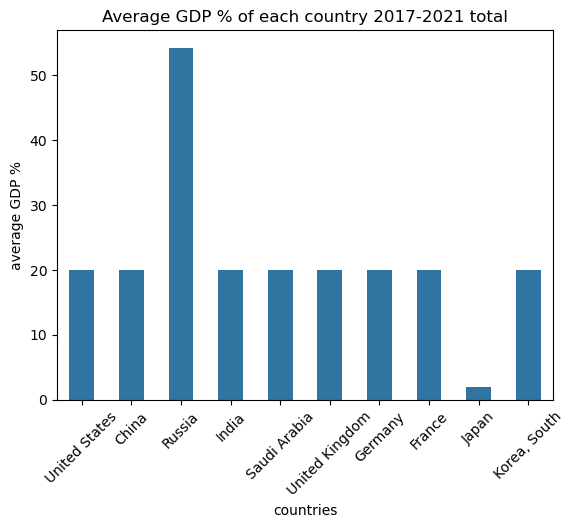

In [619]:
#bar chart of the average GDP
import seaborn as sns
#data of average
GDP_average = { 'countries': ['United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'],
               'average GDP %': [20, 20, 54.2, 20, 20, 20, 20, 20, 2, 20] }

#dataframe and bar plot
dF = pd.DataFrame.from_dict(GDP_average)
sns.barplot(x='countries', y= 'average GDP %', data= dF, width=0.5) #simple/ minimal approach to plot

#bar adjustments
plt.title('Average GDP % of each country 2017-2021 total')
plt.xticks(rotation=45)

#saving as a PNG file
plt.savefig('GDP spending (Average 2017-2021) of the top 10 country.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [521]:
#comparing the per person healthcare to the per capita
H_per_capita = pd.read_csv('Healthcare_per_capita.csv') #numeric data measured in the thousands

In [523]:
H_per_capita

,Series Name,Series Code,Country Name,Country Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,United States,USA,9902.82,10280.53,10658.40,11758.42,12012.24
1,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,United Kingdom,GBR,3910.81,4226.21,4268.68,4906.24,5738.48
2,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,China,CHN,440.59,504.80,539.62,583.43,670.51
3,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Russian Federation,RUS,580.00,609.00,654.00,771.00,936.00
4,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,India,IND,57.00,58.00,61.00,64.00,74.00
5,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Germany,DEU,5070.20,5511.21,5486.99,5936.25,6626.00
6,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,France,FRA,4410.60,4666.98,4504.48,4755.44,5380.88
7,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,"Korea, Rep.",KOR,2220.56,2501.14,2605.99,2648.22,3260.45
8,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Saudi Arabia,SAU,1261.17,1291.13,1279.69,1355.72,1442.00
9,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Japan,JPN,4148.00,4288.00,4463.00,4436.00,4347.00


In [525]:
#data 
H_per_capita_Data =  {'Country': ['United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'],
             '2017': [9902.82, 440.59, 580.00, 57.00, 1261.17, 3910.81, 5070.20, 4410.60, 4148.00, 2220.56],
             '2018': [10280.53, 504.80, 609.00, 58.00, 1291.13, 4226.21, 5511.21, 466.98, 4288.00, 2501.14],
             '2019': [10658.40, 539.62, 654.00, 61.00, 1279.69, 4268.68, 5486.99, 4504.58, 4463.00, 2605.99],

             '2020': [11758.42, 583.43, 771.00, 64.00, 1355.72, 4906.24, 5936.25, 4755.44, 4436.00, 2648.22],
             '2021': [12012.24, 670.51, 936.00, 74, 1442.00, 5738.48, 6626.00, 5380.88, 4347.00, 3260.45],
            
            }


In [527]:
#dataframe for H per capita
H_capita_df = pd.DataFrame(H_per_capita_Data,
                columns = ('2017', '2018', '2019', '2020', '2021'),
                index = ('United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'))

In [529]:
#seeing if the datafram was established
H_capita_df

,2017,2018,2019,2020,2021
United States,9902.82,10280.53,10658.40,11758.42,12012.24
China,440.59,504.80,539.62,583.43,670.51
Russia,580.00,609.00,654.00,771.00,936.00
India,57.00,58.00,61.00,64.00,74.00
Saudi Arabia,1261.17,1291.13,1279.69,1355.72,1442.00
United Kingdom,3910.81,4226.21,4268.68,4906.24,5738.48
Germany,5070.20,5511.21,5486.99,5936.25,6626.00
France,4410.60,466.98,4504.58,4755.44,5380.88
Japan,4148.00,4288.00,4463.00,4436.00,4347.00
"Korea, South",2220.56,2501.14,2605.99,2648.22,3260.45


In [531]:
#summing the years 2017-2021 and establishing a 'Total' column
HE_capita_list = ['2017', '2018', '2019', '2020', '2021']
H_capita_df['Total'] = H_capita_df[HE_capita_list].sum(axis=1)
H_capita_df

,2017,2018,2019,2020,2021,Total
United States,9902.82,10280.53,10658.40,11758.42,12012.24,54612.41
China,440.59,504.80,539.62,583.43,670.51,2738.95
Russia,580.00,609.00,654.00,771.00,936.00,3550.00
India,57.00,58.00,61.00,64.00,74.00,314.00
Saudi Arabia,1261.17,1291.13,1279.69,1355.72,1442.00,6629.71
United Kingdom,3910.81,4226.21,4268.68,4906.24,5738.48,23050.42
Germany,5070.20,5511.21,5486.99,5936.25,6626.00,28630.65
France,4410.60,466.98,4504.58,4755.44,5380.88,19518.48
Japan,4148.00,4288.00,4463.00,4436.00,4347.00,21682.00
"Korea, South",2220.56,2501.14,2605.99,2648.22,3260.45,13236.36


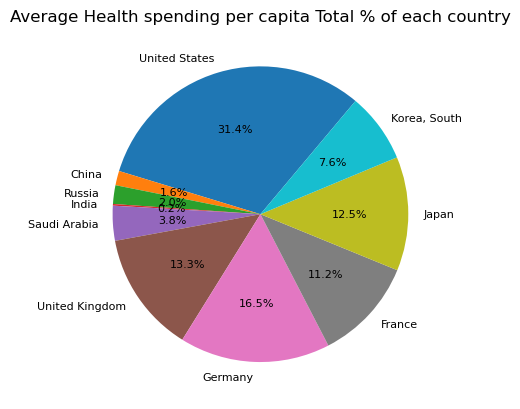

<Figure size 640x480 with 0 Axes>

In [533]:
#data used each country's health total
HE_country = ['United States', 'China','Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South']
Total_spending = [54612.41, 2738.95, 3550.00, 314.00, 6629.71, 23050.42, 28630.65, 19518.48, 21682.00, 13236.36]

#pie chart
plt.pie(Total_spending, labels=HE_country, autopct= '%1.1f%%', startangle=50, textprops={'fontsize': 8})
plt.title('Average Health spending per capita Total % of each country')
plt.show()

#saving as a PNG file
plt.savefig('Average Health spending per capita Total % of each country.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [535]:
#calculating the average
H_capita_df.mean(axis='columns')

United States    18204.14
China              912.98
Russia            1183.33
India              104.67
Saudi Arabia      2209.90
United Kingdom    7683.47
Germany           9543.55
France            6506.16
Japan             7227.33
Korea, South      4412.12
dtype: float64

In [537]:
#Military spending per capita
Military_per_capita = pd.read_excel('SIPRI-Milex-data-1948-2023.xlsx', 'Per capita', skiprows=5)

In [539]:
Military_per_capita

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,Country,Notes,1988,1989,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,§,42.43,34.32,35.44,21.62,39.38,46.68,47.78,43.35,...,250.89,263.33,253.28,244.87,228.58,241.27,223.43,206.27,203.68,400.47
4,Libya,‡§¶,...,...,...,...,...,...,...,...,...,615.88,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Syria,§,319.33,123.29,132.31,226.40,226.25,105.35,117.52,66.93,...,...,...,...,...,...,...,...,...,...,...
189,Türkiye,‖,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,United Arab Emirates,§,...,...,...,...,...,...,...,...,...,2575.27,...,...,...,...,...,...,...,...,...
191,"Yemen, North",§,...,...,xxx,xxx,xxx,xxx,xxx,xxx,...,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx


In [541]:
#establishing a dataframe
D_per_capita_Military = pd.DataFrame({'Country': ['United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'],
             '2017': [1961.1, 149.2, 460.0, 47.7, 2058.9, 788.2, 511.7, 767.0, 355.7, 760.4],
             '2018': [2054.8, 164.1, 423.0, 48.4, 2130.7, 840.4, 560.9, 799.8, 384.4, 833.4],
             '2019': [2196.5, 169.0, 447.4, 51.7, 1824.4, 847.1, 590.3, 778.2, 403.7, 851.3],

             '2020': [ 2317.1, 181.0, 423.8, 52.2, 1793.4, 869.9, 639.9, 818.0, 410.4, 889.5],
             '2021': [2392.4, 200.55, 454.2, 54.2, 1757.8, 968.1, 677.5, 877.8, 408.9, 981.6],
            
            })


#calculating for the average military spending per capita
M_capita_spending_df = pd.DataFrame(D_per_capita_Military,
                columns = ('2017', '2018', '2019', '2020', '2021'),
                index = ('United States', 'United Kingdom', 'China', 'Russia', 'India', 'Germany', 'France', 'Korea, South', 'Saudi Arabia', 'Japan'))

In [543]:
D_per_capita_Military

,Country,2017,2018,2019,2020,2021
0,United States,1961.10,2054.80,2196.50,2317.10,2392.40
1,China,149.20,164.10,169.00,181.00,200.55
2,Russia,460.00,423.00,447.40,423.80,454.20
3,India,47.70,48.40,51.70,52.20,54.20
4,Saudi Arabia,2058.90,2130.70,1824.40,1793.40,1757.80
5,United Kingdom,788.20,840.40,847.10,869.90,968.10
6,Germany,511.70,560.90,590.30,639.90,677.50
7,France,767.00,799.80,778.20,818.00,877.80
8,Japan,355.70,384.40,403.70,410.40,408.90
9,"Korea, South",760.40,833.40,851.30,889.50,981.60


In [545]:
M_capita_spending_df.mean(axis='columns')

United States    NaN
United Kingdom   NaN
China            NaN
Russia           NaN
India            NaN
Germany          NaN
France           NaN
Korea, South     NaN
Saudi Arabia     NaN
Japan            NaN
dtype: float64

In [547]:
#summing the years 2017-2021 and establishing a 'Total' column
MIL_capita_list = ['2017', '2018', '2019', '2020', '2021']
D_per_capita_Military['Total'] = D_per_capita_Military[MIL_capita_list].sum(axis=1)
D_per_capita_Military

,Country,2017,2018,2019,2020,2021,Total
0,United States,1961.10,2054.80,2196.50,2317.10,2392.40,10921.90
1,China,149.20,164.10,169.00,181.00,200.55,863.85
2,Russia,460.00,423.00,447.40,423.80,454.20,2208.40
3,India,47.70,48.40,51.70,52.20,54.20,254.20
4,Saudi Arabia,2058.90,2130.70,1824.40,1793.40,1757.80,9565.20
5,United Kingdom,788.20,840.40,847.10,869.90,968.10,4313.70
6,Germany,511.70,560.90,590.30,639.90,677.50,2980.30
7,France,767.00,799.80,778.20,818.00,877.80,4040.80
8,Japan,355.70,384.40,403.70,410.40,408.90,1963.10
9,"Korea, South",760.40,833.40,851.30,889.50,981.60,4316.20


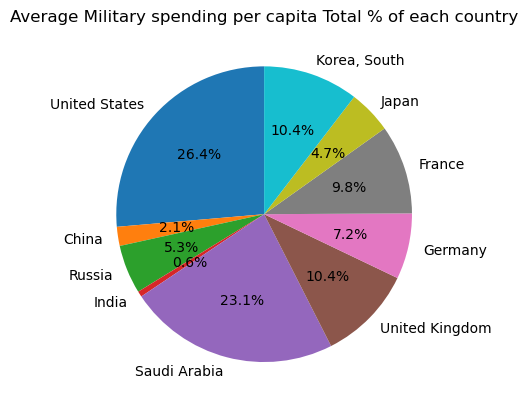

<Figure size 640x480 with 0 Axes>

In [549]:
#data used each country's military total
Military_country = ['United States', 'China','Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South']
Total_spending = [10921.90, 863.85, 2208.40, 254.20, 9565.20, 4313.70, 2980.30, 4040.80, 1963.10, 4316.20]

#pie chart
plt.pie(Total_spending, labels=Military_country, autopct= '%1.1f%%', startangle=90)
plt.title('Average Military spending per capita Total % of each country')
plt.show()

#saving as a PNG file
plt.savefig('Average Military spending per capita Total % of each country.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [551]:
#educational expenditure per capita calculations
#loading the population data 
POP = pd.read_excel('Population_total.xlsx')

#establishing a dataframe for the population data
POP_df = pd.DataFrame({'countries': ['China', 'Germany', 'France', 'United Kingdom', 'India', 'Japan', 'Korea, South', 'Russia', 'Saudi Arabia', 'United States'],
             '2017': [1396215000.00, 82657002.00, 66918020.00, 66058859.00, 1354195680.00, 126972000.00, 51361911.00, 145293260.00, 34193122.00, 325122128.00],
             '2018': [1402760000.00, 82905782.00, 67158348.00, 66460344.00, 1369003306.00, 126811000.00, 51585058.00, 145398106.00, 35018133.00, 326838199.00],
             '2019': [66836327.00, 83092962.00, 67388001.00, 66836327.00, 1383112050.00, 126633000.00, 51764822.00, 145453291.00, 35827362.00, 328329953.00],

             '2020': [1411100000.00, 83160871.00, 67571107.00, 67081234.00, 1396387127.00, 126261000.00, 51836239.00, 145245148.00, 35997107.00, 331526933.00],
             '2021': [1412360000.00, 83196078.00, 67764304.00, 67026292.00, 1407563842.00, 125681593.00, 51769539.00, 144746762.00, 35950396.00, 332048977.00],
            
            }).set_index('countries')

#verifying if the dataframe was established for population
print(POP_df)

                        2017          2018          2019          2020  \
countries                                                                
China          1396215000.00 1402760000.00   66836327.00 1411100000.00   
Germany          82657002.00   82905782.00   83092962.00   83160871.00   
France           66918020.00   67158348.00   67388001.00   67571107.00   
United Kingdom   66058859.00   66460344.00   66836327.00   67081234.00   
India          1354195680.00 1369003306.00 1383112050.00 1396387127.00   
Japan           126972000.00  126811000.00  126633000.00  126261000.00   
Korea, South     51361911.00   51585058.00   51764822.00   51836239.00   
Russia          145293260.00  145398106.00  145453291.00  145245148.00   
Saudi Arabia     34193122.00   35018133.00   35827362.00   35997107.00   
United States   325122128.00  326838199.00  328329953.00  331526933.00   

                        2021  
countries                     
China          1412360000.00  
Germany          8

In [553]:
# Educational Expenditure DataFrame
multiplication_E = pd.DataFrame({
    'countries': ['China', 'Germany', 'France', 'United Kingdom', 'India', 'Japan', 'Korea, South', 'Russia', 'Saudi Arabia', 'United States'],
    '2017': [445639786290.11, 179744353727.61, 141435731963.27, 145532039241.81, 114278540724.77, 154335209654.44, 70279112145.63, 73829949988.17, 0, 1004139622400.00],
    '2018': [491879738168.97, 197927279079.98, 150990767140.19, 149309698074.25, 118388318304.19, 155259132931.21, 76951657958.41, 77562986597.99, 0, 1057613619200.00],
    '2019': [505510885122.02, 199125892569.85, 145994558198.76, 149698876157.66, 110588644005.79, 161728605755.32, 77286593238.56, 59428336595.06, 0, 1073917610500.00],
    '2020': [524352466612.00, 229375902552.95, 150373381682.79, 148379362576.16, 114751132721.38, 167339932794.90, 78927015931.50, 55243808091.40, 0, 1159968480000.00],
    '2021': [588075163792.12, 192960527454.51, 155070244924.53, 169641332457.41, 146961356919.29, 174197879146.64, 98195333771.52, 0, 0, 1318906332900.00],
}).set_index('countries')

In [247]:
#element-wise division
multiplication_EDU = multiplication_E / POP_df

#results for the current educational expenditure per capita
print(multiplication_EDU)

                  2017    2018    2019    2020    2021
countries                                             
China           319.18  350.65 7563.42  371.59  416.38
Germany        2174.58 2387.38 2396.42 2758.22 2319.35
France         2113.57 2248.28 2166.48 2225.41 2288.38
United Kingdom 2203.07 2246.60 2239.78 2211.94 2530.97
India            84.39   86.48   79.96   82.18  104.41
Japan          1215.51 1224.33 1277.14 1325.35 1386.03
Korea, South   1368.31 1491.74 1493.03 1522.62 1896.78
Russia          508.14  533.45  408.57  380.35    0.00
Saudi Arabia      0.00    0.00    0.00    0.00    0.00
United States  3088.50 3235.89 3270.85 3498.87 3972.02


In [249]:
#summing the years 2017-2021 and establishing a 'Total' column
EDU_capita_list = ['2017', '2018', '2019', '2020', '2021']
multiplication_EDU['Total'] =multiplication_EDU[EDU_capita_list].sum(axis=1)
multiplication_EDU

,2017,2018,2019,2020,2021,Total
countries,,,,,,
China,319.18,350.65,7563.42,371.59,416.38,9021.21
Germany,2174.58,2387.38,2396.42,2758.22,2319.35,12035.95
France,2113.57,2248.28,2166.48,2225.41,2288.38,11042.11
United Kingdom,2203.07,2246.60,2239.78,2211.94,2530.97,11432.35
India,84.39,86.48,79.96,82.18,104.41,437.41
Japan,1215.51,1224.33,1277.14,1325.35,1386.03,6428.36
"Korea, South",1368.31,1491.74,1493.03,1522.62,1896.78,7772.49
Russia,508.14,533.45,408.57,380.35,0.00,1830.52
Saudi Arabia,0.00,0.00,0.00,0.00,0.00,0.00


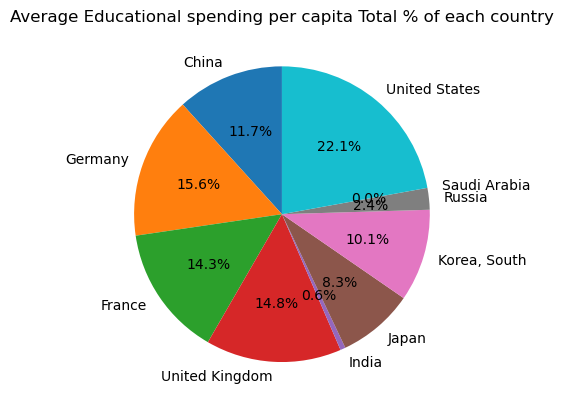

<Figure size 640x480 with 0 Axes>

In [555]:
#data used each country's EDU total
EDU_country = ['China', 'Germany', 'France', 'United Kingdom', 'India', 'Japan', 'Korea, South', 'Russia', 'Saudi Arabia', 'United States']
Total_spending = [9021.21, 12035.95, 11042.11, 11432.35, 437.41, 6428.36, 7772.49, 1830.52, 0.00, 17066.13]

#pie chart
plt.pie(Total_spending, labels=EDU_country, autopct= '%1.1f%%', startangle=90)
plt.title('Average Educational spending per capita Total % of each country')
plt.show()

#saving as a PNG file
plt.savefig('Average Educational spending per capita Total % of each country.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [253]:
#average of each country's educational expenditure per capita
multiplication_EDU.mean(axis='columns')

countries
China            3007.07
Germany          4011.98
France           3680.70
United Kingdom   3810.78
India             145.80
Japan            2142.79
Korea, South     2590.83
Russia            610.17
Saudi Arabia        0.00
United States    5688.71
dtype: float64

In [255]:
#average of each country's educational expenditure per capita
EDU_average = multiplication_EDU.mean(axis='columns')

In [257]:
#finding the total of all the countries average
edu_total_AVG = EDU_average.sum()

print(edu_total_AVG)

25688.842053271295


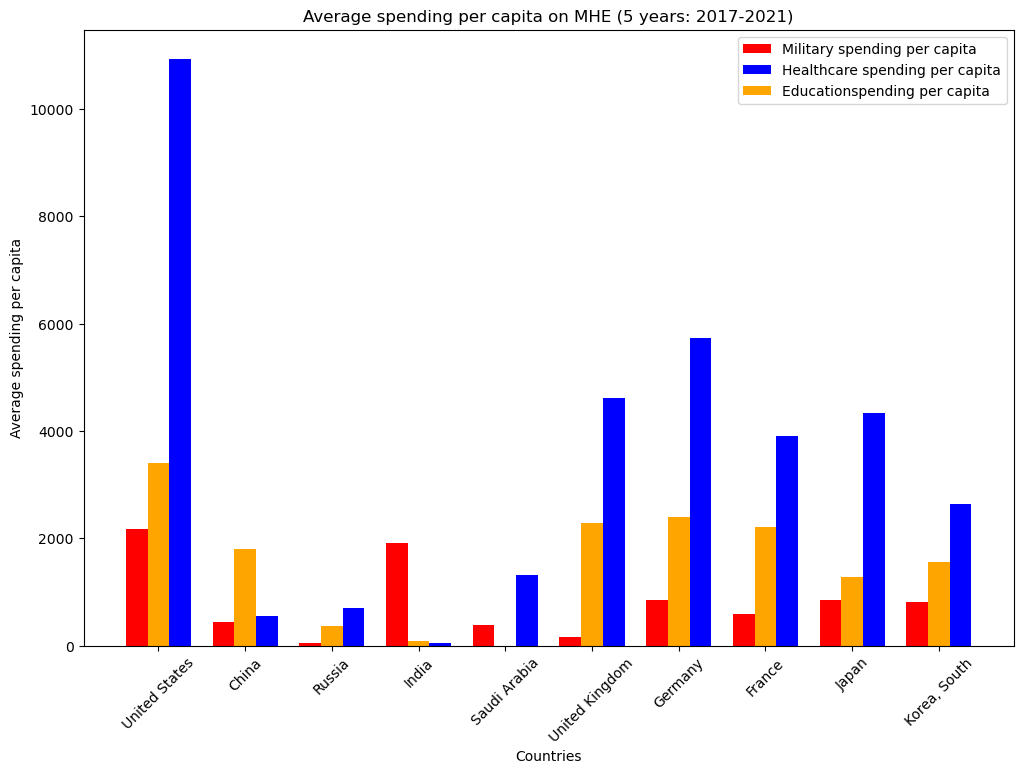

<Figure size 640x480 with 0 Axes>

In [557]:
#grouped bar chart

#data
countries = ['United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South']
Military_capita_spending = [2184.38, 441.68, 50.84, 1913.94, 392.62, 172.77, 862.74, 596.06, 863.24, 808.16]
Health_capita_spending = [10922.48, 547.79, 710.00, 62.80, 1325.94, 4610.08, 5726.13, 3903.70, 4336.40, 2647.27]
Education_capita_spending = [ 3413.23, 1804.24, 366.10, 87.48, 0.00, 2286.47, 2407.19, 2208.42, 1285.67, 1554.50]

#bar options
width = 0.25 #bar width
x = np.arange(len(countries)) #imported numpy (learned from a youtube video)

#creating the plot in memory
plt.figure(figsize=(12, 8))
plt.bar(x -  width, Military_capita_spending, width, label='Military spending per capita', color='red')
plt.bar(x + width, Health_capita_spending, width, label='Healthcare spending per capita', color='blue')
plt.bar(x, Education_capita_spending, width, label='Educationspending per capita', color='orange')

#adjustments to the bar chart
plt.xlabel('Countries')
plt.ylabel('Average spending per capita')
plt.title('Average spending per capita on MHE (5 years: 2017-2021)')
plt.xticks(x, countries, rotation=45)
plt.legend()

#show plot
plt.show()

#saving as a PNG file
plt.savefig('Average spending per capita on MHE (5 years: 2017-2021).png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [261]:
#loading data of each country's GDP (per capita)
GDP_capita_current = pd.read_excel('GDP_capita.xlsx')

In [263]:
GDP_capita_current

,Series Name,Series Code,Country Name,Country Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,United States,USA,60322.26,63201.05,65548.07,64317.40,71055.88
1,GDP per capita (current US$),NY.GDP.PCAP.CD,United Kingdom,GBR,40572.12,43203.81,42662.54,40217.01,46869.76
2,GDP per capita (current US$),NY.GDP.PCAP.CD,China,CHN,8817.05,9905.41,10143.86,10408.72,12617.51
3,GDP per capita (current US$),NY.GDP.PCAP.CD,Russian Federation,RUS,10658.91,11211.89,11447.70,10108.33,12521.52
4,GDP per capita (current US$),NY.GDP.PCAP.CD,India,IND,1957.97,1974.38,2050.16,1915.55,2250.18
5,GDP per capita (current US$),NY.GDP.PCAP.CD,Saudi Arabia,SAU,20910.48,24175.58,23405.71,20398.06,24315.62
6,GDP per capita (current US$),NY.GDP.PCAP.CD,Germany,DEU,44652.59,47939.28,46805.14,46749.48,51426.75
7,GDP per capita (current US$),NY.GDP.PCAP.CD,France,FRA,38781.05,41557.85,40494.90,39179.74,43671.31
8,GDP per capita (current US$),NY.GDP.PCAP.CD,"Korea, Rep.",KOR,31600.74,33447.16,31902.42,31721.30,35125.52
9,GDP per capita (current US$),NY.GDP.PCAP.CD,Japan,JPN,38834.05,39751.13,40415.96,40040.77,40058.54


In [427]:
#dataframe for the file
GDP_Capita_df = pd.DataFrame({'Country': ['United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'],
             '2017': [60322.26, 8817.05, 10658.91, 1957.97, 20910.48, 40572.1, 44652.59, 38781.05, 38834.05, 31600.74],
             '2018': [63201.05, 9905.41, 11211.89, 1974.38, 24175.58, 43203.81, 47939.28, 41557.85, 39751.13, 33447.16],
             '2019': [65548.07, 10143.86, 11447.70, 2050.16, 23405.71, 42662.54, 46805.14, 40494.90, 40415.96, 31902.42],

             '2020': [64317.40, 10408.72, 10108.33, 1915.55, 20398.06, 40217.01, 46749.48, 39179.74, 40040.77, 31721.30],
             '2021': [71055.88, 12617.51, 12521.52, 2250.18, 24315.62, 46869.76, 51426.75, 43671.31, 40058.54, 35125.52]
            
            })
#average percent for each country GDP per capita                     
GDP_df_spending = pd.DataFrame(GDP_Capita_df,
                columns = ('2017', '2018', '2019', '2020', '2021'),
                index = ('United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'))

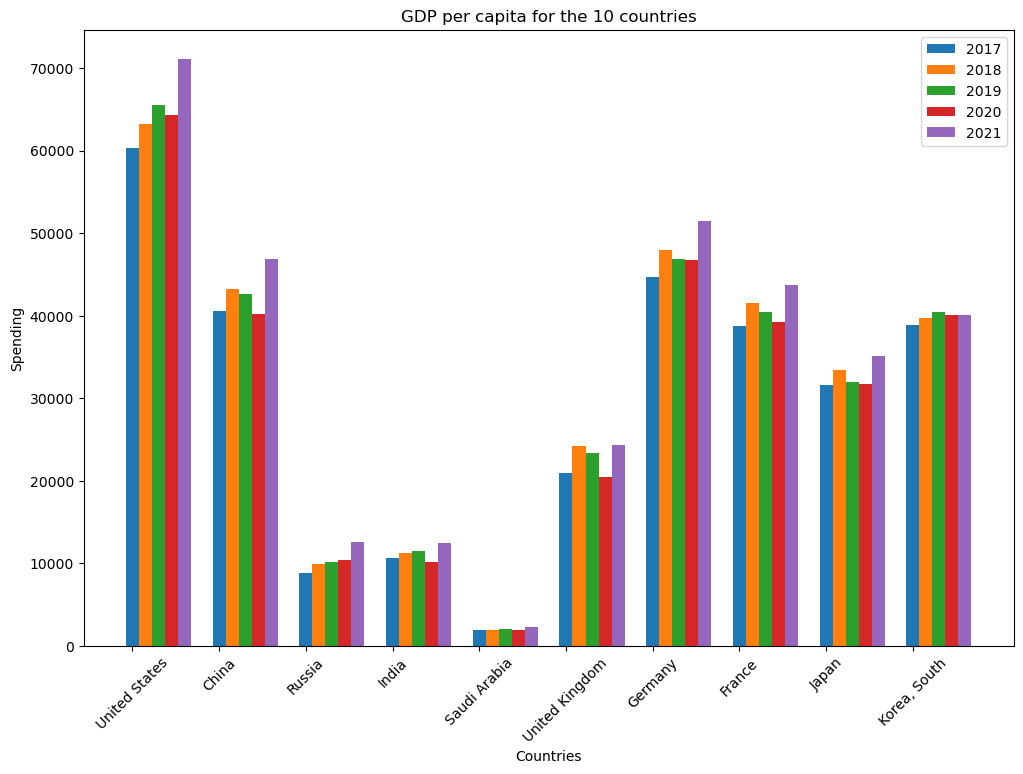

<Figure size 640x480 with 0 Axes>

In [559]:
#data
countries = ['United States', 'China', 'Russia', 'India', 'Saudi Arabia','United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South']
YR2017 = [60322.26142, 40572.12148, 8817.045608, 10658.91309, 1957.969813, 20910.48213, 44652.58917, 38781.04949, 31600.73587, 38834.05293]
YR2018 = [63201.04585, 43203.81411, 9905.406383, 11211.8877, 1974.377731, 24175.58164, 47939.27829, 41557.85486, 33447.15628, 39751.1331]
YR2019 = [65548.07078, 42662.53537, 10143.86022, 11447.70117, 2050.1638, 23405.70874, 46805.13843, 40494.89829, 31902.4169, 40415.95676]
YR2020 = [64317.39891, 40217.00901, 10408.71955, 10108.32715, 1915.551588, 20398.06143, 46749.47623, 39179.74426, 31721.29891, 40040.76551]
YR2021 = [71055.87619, 46869.75906, 12617.5051, 12521.52246, 2250.179018, 24315.61533, 51426.75037, 43671.30841, 35125.5225, 40058.53733]

#bar width
bar_width = 0.15

#bar labels
plt.figure(figsize=(12, 8))
plt.bar(x_2017, YR2017, bar_width, label='2017')
plt.bar(x_2018, YR2018, bar_width, label='2018')
plt.bar(x_2019, YR2019, bar_width, label='2019')
plt.bar(x_2020, YR2020, bar_width, label='2020')
plt.bar(x_2021, YR2021, bar_width, label='2021')

#GDP per capita titles
plt.xlabel('Countries')
plt.ylabel('Spending')
plt.title('GDP per capita for the 10 countries')
plt.xticks(x, countries, rotation=45)
plt.legend()

#Clustered bar chart display
plt.show()

#saving as a PNG file
plt.savefig('GDP per capita of the top 10 country (current US$).png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [273]:
#loading the GDP_df_spending dataframe
GDP_Capita_df

,Country,2017,2018,2019,2020,2021
0,United States,60322.26,63201.05,65548.07,64317.40,71055.88
1,China,8817.05,9905.41,10143.86,10408.72,12617.51
2,Russia,10658.91,11211.89,11447.70,10108.33,12521.52
3,India,1957.97,1974.38,2050.16,1915.55,2250.18
4,Saudi Arabia,20910.48,24175.58,23405.71,20398.06,24315.62
5,United Kingdom,40572.10,43203.81,42662.54,40217.01,46869.76
6,Germany,44652.59,47939.28,46805.14,46749.48,51426.75
7,France,38781.05,41557.85,40494.90,39179.74,43671.31
8,Japan,38834.05,39751.13,40415.96,40040.77,40058.54
9,"Korea, South",31600.74,33447.16,31902.42,31721.30,35125.52


In [275]:
#summing the years 2017-2021 and establishing a 'Total' column
GDP_capita_list = ['2017', '2018', '2019', '2020', '2021']
GDP_Capita_df['Total'] = GDP_Capita_df[GDP_capita_list].sum(axis=1)
GDP_Capita_df

,Country,2017,2018,2019,2020,2021,Total
0,United States,60322.26,63201.05,65548.07,64317.40,71055.88,324444.66
1,China,8817.05,9905.41,10143.86,10408.72,12617.51,51892.55
2,Russia,10658.91,11211.89,11447.70,10108.33,12521.52,55948.35
3,India,1957.97,1974.38,2050.16,1915.55,2250.18,10148.24
4,Saudi Arabia,20910.48,24175.58,23405.71,20398.06,24315.62,113205.45
5,United Kingdom,40572.10,43203.81,42662.54,40217.01,46869.76,213525.22
6,Germany,44652.59,47939.28,46805.14,46749.48,51426.75,237573.24
7,France,38781.05,41557.85,40494.90,39179.74,43671.31,203684.85
8,Japan,38834.05,39751.13,40415.96,40040.77,40058.54,199100.45
9,"Korea, South",31600.74,33447.16,31902.42,31721.30,35125.52,163797.14


In [277]:
#percentage change where Total is 100% 
years = ['2017', '2018', '2019', '2020', '2021']
for year in years:
        GDP_Capita_df[f'{year} (%)'] = (GDP_Capita_df[year] / GDP_Capita_df['Total']) * 100

#printing the country name and % columns for the GDP
print(GDP_Capita_df[['Country'] + [f'{year} (%)' for year in years]])

          Country  2017 (%)  2018 (%)  2019 (%)  2020 (%)  2021 (%)
0   United States     18.59     19.48     20.20     19.82     21.90
1           China     16.99     19.09     19.55     20.06     24.31
2          Russia     19.05     20.04     20.46     18.07     22.38
3           India     19.29     19.46     20.20     18.88     22.17
4    Saudi Arabia     18.47     21.36     20.68     18.02     21.48
5  United Kingdom     19.00     20.23     19.98     18.83     21.95
6         Germany     18.80     20.18     19.70     19.68     21.65
7          France     19.04     20.40     19.88     19.24     21.44
8           Japan     19.50     19.97     20.30     20.11     20.12
9    Korea, South     19.29     20.42     19.48     19.37     21.44


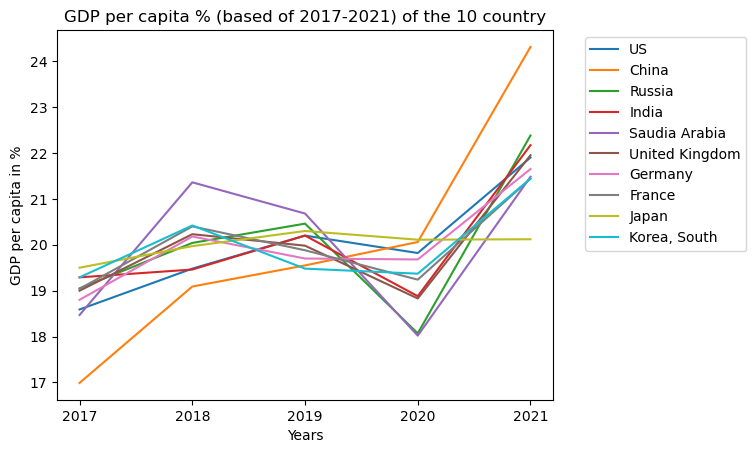

In [561]:
#line chart
#data
x= [2017, 2018, 2019, 2020, 2021]
y1= [18.59,	19.48,	20.20,	19.82,	21.90]
y2= [16.99,	19.09,	19.55,	20.06,	24.31]
y3= [19.05,	20.04,	20.46,	18.07,	22.38]
y4= [19.29,	19.46,	20.20,	18.88,	22.17]
y5= [18.47,	21.36,	20.68,	18.02,	21.48]
y6= [19.00,	20.23,	19.98,	18.83,	21.95]
y7= [18.80,	20.18,	19.70,	19.68,	21.65]
y8=  [19.04,	20.40,	19.88,	19.24,	21.44] 
y9= [19.50,	19.97,	20.30,	20.11,	20.12] 
y10= [19.29,	20.42,	19.48,	19.37,	21.44]

#plot adjustments
plt.plot(x,y1, label= 'US')
plt.plot(x,y2, label= 'China')
plt.plot(x,y3, label= 'Russia')
plt.plot(x,y4, label='India')
plt.plot(x,y5, label='Saudia Arabia')
plt.plot(x,y6, label='United Kingdom')
plt.plot(x,y7, label='Germany')
plt.plot(x,y8, label='France')
plt.plot(x,y9, label='Japan')
plt.plot(x,y10, label='Korea, South')

#legend and axis adjustments
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Years')
plt.xticks(x)
plt.ylabel('GDP per capita in %')
plt.title('GDP per capita % (based of 2017-2021) of the 10 country')


#saving as a PNG file
plt.savefig('GDP per capita % (based of 2017-2021) of the 10 country.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

#displaying plot
plt.show()

In [433]:
M_spending_df.mean(axis='columns')

United States    729643.17
China            245442.02
Russia            64268.74
India             70314.34
Saudi Arabia      67625.62
United Kingdom    57941.78
Germany           49538.00
France            52023.70
Japan             49345.28
Korea, South      44683.50
dtype: float64

In [435]:
#health spending
#loading the data of government expenditure on health, total % of GDP (filtered)
H_P_filter

,Country Name,2017,2018,2019,2020,2021
40,China,5.07,5.17,5.35,5.59,5.38
55,Germany,11.34,11.48,11.72,12.69,12.93
77,France,11.35,11.21,11.09,12.13,12.31
81,United Kingdom,9.60,9.73,9.96,12.16,12.36
109,India,2.94,2.86,2.95,3.34,3.28
119,Japan,10.66,10.74,10.97,11.00,10.82
126,"Korea, Rep.",7.05,7.49,8.17,8.35,9.33
202,Russian Federation,5.36,5.36,5.65,7.57,7.39
205,Saudi Arabia,6.03,5.34,5.47,6.65,5.97
251,United States,16.77,16.63,16.67,18.76,17.36


In [285]:
#making a dataframe for these countries converted as decimal values
H_P_filter_decimal =  pd.DataFrame({ 'countries': ['China', 'Germany', 'France', 'United Kingdom', 'India', 'Japan', 'Korea, South', 'Russia', 'Saudi Arabia', 'United States'],
    '2017': [0.0507, 0.1134, 0.1135, 0.0960, 0.0294, 0.1066, 0.0705, 0.0536, 0.0603, 0.1677],
    '2018': [0.0517, 0.1148, 0.1121, 0.0973, 0.0286, 0.1074, 0.0749, 0.0536, 0.0534, 0.1663],
    '2019': [0.0535, 0.1172, 0.1109, 0.0996, 0.0295, 0.1097, 0.0817, 0.0565, 0.0547, 0.1667],
    '2020': [0.0559, 0.1269, 0.1213, 0.1216, 0.0334, 0.11, 0.0835, 0.0757, 0.0665, 0.1876],
    '2021': [0.0538, 0.1293, 0.1231, 0.1236, 0.0328, 0.1082, 0.0933, 0.0739, 0.0597, 0.1736],
})

print(H_P_filter_decimal)

        countries  2017  2018  2019  2020  2021
0           China  0.05  0.05  0.05  0.06  0.05
1         Germany  0.11  0.11  0.12  0.13  0.13
2          France  0.11  0.11  0.11  0.12  0.12
3  United Kingdom  0.10  0.10  0.10  0.12  0.12
4           India  0.03  0.03  0.03  0.03  0.03
5           Japan  0.11  0.11  0.11  0.11  0.11
6    Korea, South  0.07  0.07  0.08  0.08  0.09
7          Russia  0.05  0.05  0.06  0.08  0.07
8    Saudi Arabia  0.06  0.05  0.05  0.07  0.06
9   United States  0.17  0.17  0.17  0.19  0.17


In [287]:
#loading the data and creating a dataframe of the GDP of each country
GDP_df

GDP_df = pd.DataFrame({
    'countries': ['China', 'Germany', 'France', 'United Kingdom', 'India', 'Japan', 'Korea, South', 'Russia', 'Saudi Arabia', 'United States'],
             '2017': [12310491333980.89, 3690849152517.65, 2595151045197.65, 2680148052335.30, 2651474262755.59, 4930837369151.42, 1623074183501.90, 1574199360089.00, 714994666666.67, 19612102000000.00],
             '2018': [13894907857880.58, 3974443355019.60, 2790956878746.66, 2871340347581.79, 2702929641648.14, 5040880939324.86, 1725373496825.43, 1657328773461.31, 846583733333.33, 20656516000000.00],
             '2019': [14279968506271.73, 3889177589254.90, 2728870246705.88, 2851407164907.81, 2835606256558.84, 5117993853016.51, 1651422932447.77, 1693115002708.32, 838564800000.00, 21521395000000.00],

             '2020': [14687744162801.03, 3887727161914.41,	2647418691598.45, 2697806592293.86, 2674851578586.86, 5055587093501.59, 1644312831906.17, 1493075894362.14, 734271200000.00, 21322950000000.00],
             '2021': [17820459508852.1, 4278503934689.85, 2959355819170.50, 3141506156618.70, 3167270623260.52, 5034620784584.98, 1818432106880.04, 1843392293734.38, 874156000000.00, 23594031000000.00]
            
            })



In [289]:
#aligning both DataFrames on the keyword 'countries'
H_P_filter_decimal = H_P_filter_decimal.set_index('countries')
GDP_df = GDP_df.set_index('countries')

#element-wise multiplication
multiplication = H_P_filter_decimal * GDP_df

#results for the current health expenditure
print(multiplication)

                           2017             2018             2019  \
countries                                                           
China           624141910632.83  718366736252.43  763978315085.54   
Germany         418542293895.50  456266097156.25  455811613460.67   
France          294549643629.93  312866266107.50  302631710359.68   
United Kingdom  257294213024.19  279381415819.71  284000153624.82   
India            77953343325.01   77303787751.14   83650384568.49   
Japan           525627263551.54  541390612883.49  561443925675.91   
Korea, South    114426729936.88  129230474912.22  134921253580.98   
Russia           84377085700.77   88832822257.53   95660997653.02   
Saudi Arabia     43114178400.00   45207571360.00   45869494560.00   
United States  3288949505400.00 3435178610800.00 3587616546500.00   

                           2020             2021  
countries                                         
China           821044898700.58  958740721576.24  
Germany         49

In [291]:
#dataframe to calculate the average
H_spending_df = pd.DataFrame(multiplication,
                columns = ('2017', '2018', '2019', '2020', '2021'),
                index = ('United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'))

In [293]:
H_spending_df

,2017,2018,2019,2020,2021
United States,3288949505400.00,3435178610800.00,3587616546500.00,4000185420000.00,4095923781600.00
China,624141910632.83,718366736252.43,763978315085.54,821044898700.58,958740721576.24
Russia,84377085700.77,88832822257.53,95660997653.02,113025845203.21,136226690506.97
India,77953343325.01,77303787751.14,83650384568.49,89340042724.80,103886476442.95
Saudi Arabia,43114178400.00,45207571360.00,45869494560.00,48829034800.00,52187113200.00
United Kingdom,257294213024.19,279381415819.71,284000153624.82,328053281622.93,388290160958.07
Germany,418542293895.50,456266097156.25,455811613460.67,493352576846.94,553210558755.40
France,294549643629.93,312866266107.50,302631710359.68,321131887290.89,364296701339.89
Japan,525627263551.54,541390612883.49,561443925675.91,556114580285.17,544745968892.09
"Korea, South",114426729936.88,129230474912.22,134921253580.98,137300121464.17,169659715571.91


In [295]:
#average of healthcare current spending
H_spending_df.mean(axis='columns')

United States    3681570772860.00
China             777254516449.52
Russia            103624688264.30
India              86426806962.48
Saudi Arabia       47041478464.00
United Kingdom    307403845009.94
Germany           475436628022.95
France            319095241745.58
Japan             545864470257.64
Korea, South      137107659093.23
dtype: float64

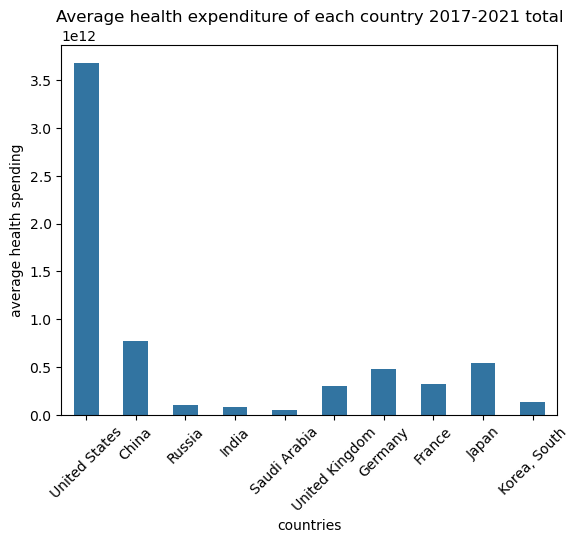

In [563]:
#bar chart of the average healthcare spending
import seaborn as sns
#data of average
Health_average = { 'countries': ['United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'],
               'average health spending': [3681570772860.00, 777254516449.52, 103624688264.30, 86426806962.48, 47041478464.00, 307403845009.94,
                                           475436628022.95, 319095241745.58, 545864470257.64, 137107659093.23] }

#dataframe and bar plot
dF = pd.DataFrame.from_dict(Health_average)
sns.barplot(x='countries', y= 'average health spending', data= dF, width=0.5) #simple/ minimal approach to plot

#bar adjustments
plt.title('Average health expenditure of each country 2017-2021 total')
plt.xticks(rotation=45)

#saving as a PNG file
plt.savefig('Average health expenditure 2017-2021 total of the top 10 country.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [298]:
#data for the top 10 countries in military spending (current US$)
top_10_df_indexed_by_country

,2017,2018,2019,2020,2021
Country,,,,,
United States of America,646752.93,682491.40,734344.10,778397.20,806230.20
China,210443.03,232530.60,240332.56,257973.43,285930.52
India,64559.44,66257.80,71468.90,72937.06,76348.54
Russia,66913.03,61609.20,65201.34,61712.54,65907.71
United Kingdom,52075.01,55832.92,56567.60,58332.37,65136.22
Saudi Arabia,70400.00,74612.27,65362.67,64558.40,63194.67
France,49195.66,51409.81,50118.93,52747.06,56647.00
Germany,42281.11,46497.68,49079.44,53318.71,56513.13
Japan,45058.47,48535.91,50778.01,51396.54,50957.47


In [299]:
#Top 10 military spending countries (absolute)
D_Military = {'Country': ['United States of America', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'],
             '2017': [646752.93, 210443.0, 66913.0, 64559.4, 70400.0, 52075.0, 42281.1, 49195.7, 45058.5, 39170.7],
             '2018': [682491.40, 232530.6, 61609.2, 66257.8, 74612.3, 55832.9, 46497.7, 51409.8, 48535.9, 43070.0],
             '2019': [734344.10, 240332.6, 65201.3, 71468.9, 65362.7, 58332.4, 49079.4, 50118.9, 50778.0, 44102.2],

             '2020': [778397.2, 257973.4, 61712.5, 72937.1, 64558.4, 58332.4, 53318.7, 52747.1, 51396.5, 46117.1],
             '2021': [806230.2, 285930.5, 65907.7, 76348.5, 63194.7, 65136.2, 56513.1, 56647.0, 50957.5, 50957.5]
            
            }


#calculating for the average military spending 
M_spending_df = pd.DataFrame(D_Military,
                columns = ('2017', '2018', '2019', '2020', '2021'),
                index = ('United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'))

In [300]:
#average of military current spending
M_spending_df.mean(axis='columns')

United States    729643.17
China            245442.02
Russia            64268.74
India             70314.34
Saudi Arabia      67625.62
United Kingdom    57941.78
Germany           49538.00
France            52023.70
Japan             49345.28
Korea, South      44683.50
dtype: float64

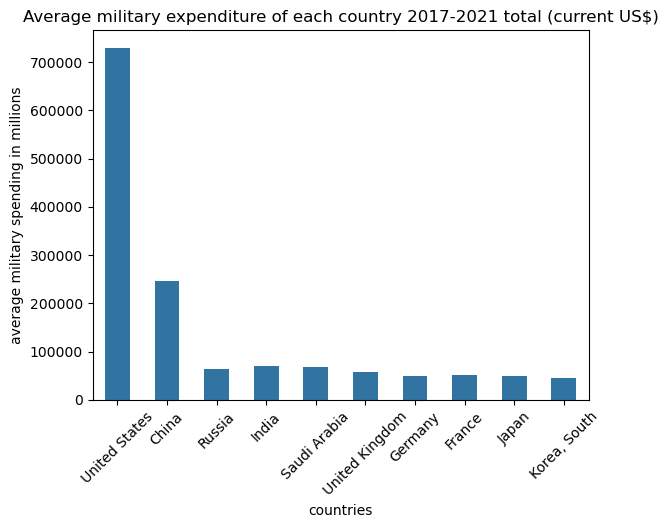

In [565]:
#bar chart of the average miliary spending
import seaborn as sns
#data of average
Military_average = { 'countries': ['United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'],
               'average military spending in millions': [729643.17, 245442.02, 64268.76, 70314.35,  67625.60, 57941.78, 49538.00,
                                           52023.70,  49345.28, 44683.50] }

#dataframe and bar plot
dF = pd.DataFrame.from_dict(Military_average)
sns.barplot(x='countries', y= 'average military spending in millions', data= dF, width=0.5) #simple/ minimal approach to plot

#bar adjustments
plt.title('Average military expenditure of each country 2017-2021 total (current US$)')
plt.xticks(rotation=45)

#saving as a PNG file
plt.savefig('Average military expenditure 2017-2021 total (current US$)of the top 10 country.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [306]:
#loading the educational spending % of of GDP
E_P_filter

,Country Name,2017,2018,2019,2020,2021
40,China,3.62,3.54,3.54,3.57,3.30
55,Germany,4.87,4.98,5.12,5.59,4.51
77,France,5.45,5.41,5.35,5.68,5.24
81,United Kingdom,5.43,5.20,5.25,5.50,5.40
109,India,4.31,4.38,3.90,4.29,4.64
119,Japan,3.13,3.08,3.16,3.31,3.46
126,"Korea, Rep.",4.33,4.46,4.68,4.80,5.40
202,Russian Federation,4.69,4.68,3.51,3.70,NaN
205,Saudi Arabia,NaN,NaN,NaN,NaN,NaN
251,United States,5.12,4.93,4.99,5.44,5.59


In [307]:
#making a dataframe for these countries converted as decimal values
E_P_filter_decimal =  pd.DataFrame({ 'countries': ['China', 'Germany', 'France', 'United Kingdom', 'India', 'Japan', 'Korea, South', 'Russia', 'Saudi Arabia', 'United States'],
    '2017': [0.0362, 0.0487, 0.0545, 0.0543, 0.0431, 0.0313, 0.0433, 0.0469, 0, 0.0512],
    '2018': [0.0354, 0.0498, 0.0541, 0.0520, 0.0438, 0.0308, 0.0446, 0.0468, 0, 0.0512],
    '2019': [0.0354, 0.0512, 0.0535, 0.0525, 0.0390, 0.0316, 0.0468, 0.0351, 0, 0.0499],
    '2020': [0.0357, 0.059, 0.0568, 0.0550, 0.0429, 0.0331, 0.0480, 0.037, 0, 0.0544],
    '2021': [0.0330, 0.0451, 0.0524, 0.054, 0.0464, 0.0346, 0.0540, 0, 0, 0.0559],
})

print(E_P_filter_decimal)

        countries  2017  2018  2019  2020  2021
0           China  0.04  0.04  0.04  0.04  0.03
1         Germany  0.05  0.05  0.05  0.06  0.05
2          France  0.05  0.05  0.05  0.06  0.05
3  United Kingdom  0.05  0.05  0.05  0.06  0.05
4           India  0.04  0.04  0.04  0.04  0.05
5           Japan  0.03  0.03  0.03  0.03  0.03
6    Korea, South  0.04  0.04  0.05  0.05  0.05
7          Russia  0.05  0.05  0.04  0.04  0.00
8    Saudi Arabia  0.00  0.00  0.00  0.00  0.00
9   United States  0.05  0.05  0.05  0.05  0.06


In [311]:
#loading the data and creating a dataframe of the GDP of each country
GDP_df

GDP_df = pd.DataFrame({
    'countries': ['China', 'Germany', 'France', 'United Kingdom', 'India', 'Japan', 'Korea, South', 'Russia', 'Saudi Arabia', 'United States'],
             '2017': [12310491333980.89, 3690849152517.65, 2595151045197.65, 2680148052335.30, 2651474262755.59, 4930837369151.42, 1623074183501.90, 1574199360089.00, 714994666666.67, 19612102000000.00],
             '2018': [13894907857880.58, 3974443355019.60, 2790956878746.66, 2871340347581.79, 2702929641648.14, 5040880939324.86, 1725373496825.43, 1657328773461.31, 846583733333.33, 20656516000000.00],
             '2019': [14279968506271.73, 3889177589254.90, 2728870246705.88, 2851407164907.81, 2835606256558.84, 5117993853016.51, 1651422932447.77, 1693115002708.32, 838564800000.00, 21521395000000.00],
             '2020': [14687744162801.03, 3887727161914.41,	2647418691598.45, 2697806592293.86, 2674851578586.86, 5055587093501.59, 1644312831906.17, 1493075894362.14, 734271200000.00, 21322950000000.00],
             '2021': [17820459508852.1, 4278503934689.85, 2959355819170.50, 3141506156618.70, 3167270623260.52, 5034620784584.98, 1818432106880.04, 1843392293734.38, 874156000000.00, 23594031000000.00]
            
            })


In [313]:
#aligning both DataFrames on the keyword 'countries'
E_P_filter_decimal = E_P_filter_decimal.set_index('countries')
GDP_df = GDP_df.set_index('countries')

#element-wise multiplication
multiplication_E = E_P_filter_decimal * GDP_df

#results for the current education expenditure
print(multiplication_E)

                           2017             2018             2019  \
countries                                                           
China           445639786290.11  491879738168.97  505510885122.02   
Germany         179744353727.61  197927279079.98  199125892569.85   
France          141435731963.27  150990767140.19  145994558198.76   
United Kingdom  145532039241.81  149309698074.25  149698876157.66   
India           114278540724.77  118388318304.19  110588644005.79   
Japan           154335209654.44  155259132931.21  161728605755.32   
Korea, South     70279112145.63   76951657958.41   77286593238.56   
Russia           73829949988.17   77562986597.99   59428336595.06   
Saudi Arabia               0.00             0.00             0.00   
United States  1004139622400.00 1057613619200.00 1073917610500.00   

                           2020             2021  
countries                                         
China           524352466612.00  588075163792.12  
Germany         22

In [315]:
multiplication_E

,2017,2018,2019,2020,2021
countries,,,,,
China,445639786290.11,491879738168.97,505510885122.02,524352466612.00,588075163792.12
Germany,179744353727.61,197927279079.98,199125892569.85,229375902552.95,192960527454.51
France,141435731963.27,150990767140.19,145994558198.76,150373381682.79,155070244924.53
United Kingdom,145532039241.81,149309698074.25,149698876157.66,148379362576.16,169641332457.41
India,114278540724.77,118388318304.19,110588644005.79,114751132721.38,146961356919.29
Japan,154335209654.44,155259132931.21,161728605755.32,167339932794.90,174197879146.64
"Korea, South",70279112145.63,76951657958.41,77286593238.56,78927015931.50,98195333771.52
Russia,73829949988.17,77562986597.99,59428336595.06,55243808091.40,0.00
Saudi Arabia,0.00,0.00,0.00,0.00,0.00


In [317]:
#dataframe for multiplication_E
multiplication_E =  pd.DataFrame({ 'countries': ['China', 'Germany', 'France', 'United Kingdom', 'India', 'Japan', 'Korea, South', 'Russia', 'Saudi Arabia', 'United States'],
    '2017': [445639786290.11, 179744353727.61, 141435731963.27, 145532039241.81, 114278540724.77, 154335209654.44, 70279112145.63, 73829949988.17, 0, 1004139622400.00],
    '2018': [491879738168.97, 197927279079.98,150990767140.19, 149309698074.25, 118388318304.19, 155259132931.21, 76951657958.41, 77562986597.99, 0, 1057613619200.00],
    '2019': [505510885122.02, 199125892569.85, 145994558198.76, 149698876157.66, 110588644005.79, 161728605755.32, 77286593238.56, 59428336595.06, 0, 1073917610500.00],
    '2020': [524352466612.00, 229375902552.95, 150373381682.79, 148379362576.16, 114751132721.38, 167339932794.90, 78927015931.50, 55243808091.40, 0, 1159968480000.00],
    '2021': [588075163792.12, 192960527454.51, 155070244924.53, 169641332457.41, 146961356919.29, 174197879146.64, 98195333771.52, 0, 0, 1318906332900.00],
}).set_index('countries')

print(multiplication_E)

                           2017             2018             2019  \
countries                                                           
China           445639786290.11  491879738168.97  505510885122.02   
Germany         179744353727.61  197927279079.98  199125892569.85   
France          141435731963.27  150990767140.19  145994558198.76   
United Kingdom  145532039241.81  149309698074.25  149698876157.66   
India           114278540724.77  118388318304.19  110588644005.79   
Japan           154335209654.44  155259132931.21  161728605755.32   
Korea, South     70279112145.63   76951657958.41   77286593238.56   
Russia           73829949988.17   77562986597.99   59428336595.06   
Saudi Arabia               0.00             0.00             0.00   
United States  1004139622400.00 1057613619200.00 1073917610500.00   

                           2020             2021  
countries                                         
China           524352466612.00  588075163792.12  
Germany         22

In [ ]:
E_spending_df

In [ ]:
#average of educational current spending
E_spending_df.mean(axis='columns')

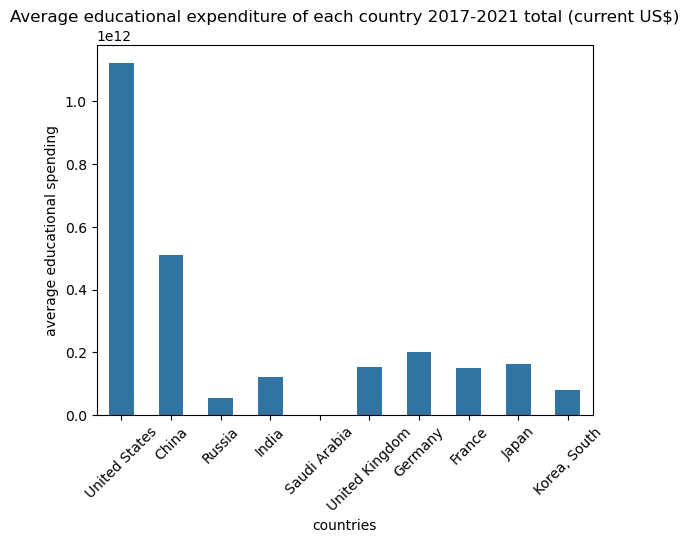

In [567]:
#bar chart of the average healthcare spending
import seaborn as sns
#data of average
Edu_average = { 'countries': ['United States', 'China', 'Russia', 'India', 'Saudi Arabia', 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, South'],
               'average educational spending': [1122909133000.00, 511091607997.04, 53213016254.52,  120993598535.08,  0, 152512261701.46, 199826791076.98,
                                           148772936781.91,  162572152056.50, 80327942609.12] }

#dataframe and bar plot
dF = pd.DataFrame.from_dict(Edu_average)
sns.barplot(x='countries', y= 'average educational spending', data= dF, width=0.5) #simple/ minimal approach to plot

#bar adjustments
plt.title('Average educational expenditure of each country 2017-2021 total (current US$)')
plt.xticks(rotation=45)

#saving as a PNG file
plt.savefig('Average educational expenditure 2017-2021 total (current US$)of the top 10 country.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [321]:
#current health expenditure in US$
print(H_spending_df)

                           2017             2018             2019  \
United States  3288949505400.00 3435178610800.00 3587616546500.00   
China           624141910632.83  718366736252.43  763978315085.54   
Russia           84377085700.77   88832822257.53   95660997653.02   
India            77953343325.01   77303787751.14   83650384568.49   
Saudi Arabia     43114178400.00   45207571360.00   45869494560.00   
United Kingdom  257294213024.19  279381415819.71  284000153624.82   
Germany         418542293895.50  456266097156.25  455811613460.67   
France          294549643629.93  312866266107.50  302631710359.68   
Japan           525627263551.54  541390612883.49  561443925675.91   
Korea, South    114426729936.88  129230474912.22  134921253580.98   

                           2020             2021  
United States  4000185420000.00 4095923781600.00  
China           821044898700.58  958740721576.24  
Russia          113025845203.21  136226690506.97  
India            89340042724.80  103

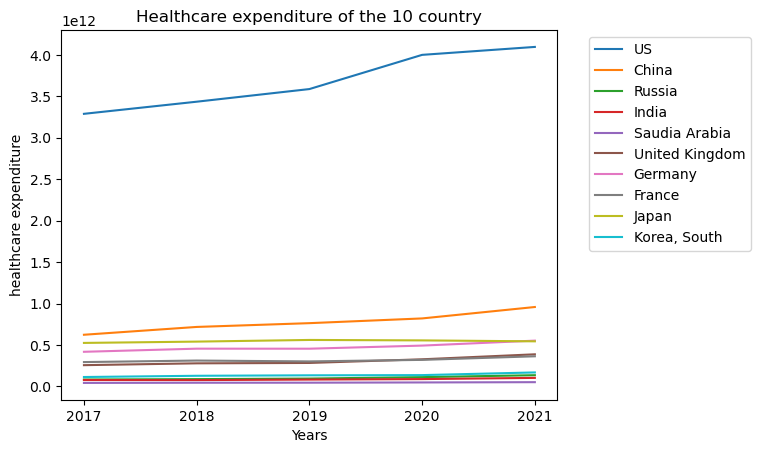

In [569]:
#line chart
#data
x= [2017, 2018, 2019, 2020, 2021]
y1= [3288949505400.00, 3435178610800.00, 3587616546500.00, 4000185420000.00, 4095923781600.00]
y2= [624141910632.83,  718366736252.43,  763978315085.54, 821044898700.58,  958740721576.24]
y3= [84377085700.77,   88832822257.53,   95660997653.02, 113025845203.21,  136226690506.97]
y4= [77953343325.01,   77303787751.14,   83650384568.49, 89340042724.80,  103886476442.95]
y5= [43114178400.00,   45207571360.00,   45869494560.00,  48829034800.00,   52187113200.00]
y6= [257294213024.19,  279381415819.71,  284000153624.82, 328053281622.93,  388290160958.07]
y7= [418542293895.50,  456266097156.25,  455811613460.67, 493352576846.94,  553210558755.40]
y8=  [294549643629.93,  312866266107.50,  302631710359.68, 321131887290.89,  364296701339.89] 
y9= [525627263551.54, 541390612883.49,  561443925675.91, 556114580285.17, 544745968892.09] 
y10= [114426729936.88,  129230474912.22,  134921253580.98, 137300121464.17,  169659715571.91]

#plot adjustments
plt.plot(x,y1, label= 'US')
plt.plot(x,y2, label= 'China')
plt.plot(x,y3, label= 'Russia')
plt.plot(x,y4, label='India')
plt.plot(x,y5, label='Saudia Arabia')
plt.plot(x,y6, label='United Kingdom')
plt.plot(x,y7, label='Germany')
plt.plot(x,y8, label='France')
plt.plot(x,y9, label='Japan')
plt.plot(x,y10, label='Korea, South')

#legend and axis adjustments
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Years')
plt.xticks(x)
plt.ylabel('healthcare expenditure')
plt.title('Healthcare expenditure of the 10 country')


#saving as a PNG file
plt.savefig('Healthcare expenditure of the 10 country.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

#displaying plot
plt.show()

In [331]:
#current educational spending (current US$)
print(multiplication_E)

                           2017             2018             2019  \
countries                                                           
China           445639786290.11  491879738168.97  505510885122.02   
Germany         179744353727.61  197927279079.98  199125892569.85   
France          141435731963.27  150990767140.19  145994558198.76   
United Kingdom  145532039241.81  149309698074.25  149698876157.66   
India           114278540724.77  118388318304.19  110588644005.79   
Japan           154335209654.44  155259132931.21  161728605755.32   
Korea, South     70279112145.63   76951657958.41   77286593238.56   
Russia           73829949988.17   77562986597.99   59428336595.06   
Saudi Arabia               0.00             0.00             0.00   
United States  1004139622400.00 1057613619200.00 1073917610500.00   

                           2020             2021  
countries                                         
China           524352466612.00  588075163792.12  
Germany         22

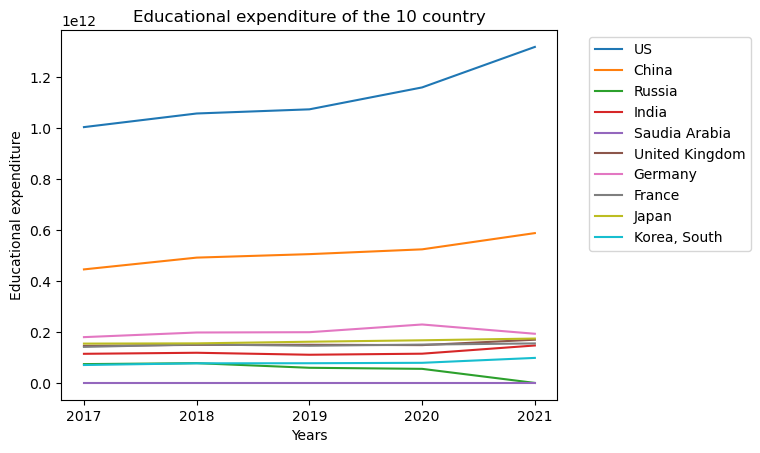

In [571]:
#line chart
#data
x= [2017, 2018, 2019, 2020, 2021]
y1= [1004139622400.00, 1057613619200.00, 1073917610500.00, 1159968480000.00, 1318906332900.00]
y2= [445639786290.11,  491879738168.97,  505510885122.02, 524352466612.00,  588075163792.12]
y3= [73829949988.17,   77562986597.99,   59428336595.06, 55243808091.40, 0.00]
y4= [114278540724.77,  118388318304.19,  110588644005.79, 114751132721.38,  146961356919.29]
y5= [0, 0, 0, 0, 0]
y6= [145532039241.81 , 149309698074.25 , 149698876157.66, 148379362576.16,  169641332457.41]
y7= [179744353727.61,  197927279079.98,  199125892569.85, 229375902552.95,  192960527454.51]
y8=  [141435731963.27,  150990767140.19,  145994558198.76, 150373381682.79,  155070244924.53] 
y9= [154335209654.44,  155259132931.21,  161728605755.32, 167339932794.90,  174197879146.64] 
y10= [70279112145.63,   76951657958.41,   77286593238.56, 78927015931.50,   98195333771.52]

#plot adjustments
plt.plot(x,y1, label= 'US')
plt.plot(x,y2, label= 'China')
plt.plot(x,y3, label= 'Russia')
plt.plot(x,y4, label='India')
plt.plot(x,y5, label='Saudia Arabia')
plt.plot(x,y6, label='United Kingdom')
plt.plot(x,y7, label='Germany')
plt.plot(x,y8, label='France')
plt.plot(x,y9, label='Japan')
plt.plot(x,y10, label='Korea, South')

#legend and axis adjustments
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Years')
plt.xticks(x)
plt.ylabel('Educational expenditure')
plt.title('Educational expenditure of the 10 country')


#saving as a PNG file
plt.savefig('Educational expenditure of the 10 country.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

#displaying plot
plt.show()